# Teste de um framework de classificação
Esse notebook está usando uma base de dados aberta obtida em https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work.

In [1]:
# Instruções basiconas de sempre.

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from plotting import (multiple_histograms_plot,
                      bar_plot_with_categorical,
                      plot_confusion_matrix,
                      plot_confusion_matrix_2,
                      plot_roc)

# Lidar com preparação de dados.
from data_prep import data_prep as dp # Eu que fiz esse modulinho ("uuuuuuuuuma bosts!").
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (StandardScaler
                                   , MinMaxScaler)
from sklearn.model_selection import (train_test_split
                                     , cross_val_score
                                     , StratifiedKFold)

# Lidar com validação de modelos.
from sklearn.metrics import (confusion_matrix
                             , accuracy_score
                             , classification_report)

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
nomeDaBase = "../bases/Absenteeism_at_work.csv"
df = pd.read_csv(nomeDaBase, sep=";", encoding="utf-8")

df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


## Criação de novo target
No problema original, a variável resposta/variável dependente/target é "Absenteeism time in hours". Porém, para facilitar a minha vida criei uma regra e, consequentemente, um novo target "Absenteeism". Esse novo target assumi valor 0 (<=2h) ou 1(>2h).

In [5]:
df["Absenteeism"] = np.where(df["Absenteeism time in hours"] <= 2, 0, 1)

In [6]:
df.head().T

,0,1,2,3,4
ID,11.000,36.000,3.000,7.000,11.000
Reason for absence,26.000,0.000,23.000,7.000,23.000
Month of absence,7.000,7.000,7.000,7.000,7.000
Day of the week,3.000,3.000,4.000,5.000,5.000
Seasons,1.000,1.000,1.000,1.000,1.000
Transportation expense,289.000,118.000,179.000,279.000,289.000
Distance from Residence to Work,36.000,13.000,51.000,5.000,36.000
Service time,13.000,18.000,18.000,14.000,13.000
Age,33.000,50.000,38.000,39.000,33.000
Work load Average/day,239.554,239.554,239.554,239.554,239.554


In [7]:
df[df["Month of absence"] == 0]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absenteeism
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0,0
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0,0
739,35,0,0,6,3,179,45,14,53,271.219,95,0,1,1,0,0,1,77,175,25,0,0


# ALERTA
## Nota não mental:
Há registros com problemas, preciso voltar ao data prep posteriormente para arrumar. No momento, seguirei com os problemas pois meu foco nesse momento é criar um pipeline para problemas de classificação com bases de dados temporais.

**Problema encontrado até o momento:**
- "Month of absence" == 0 -> Impossível, claro...

In [51]:
df_temporario = df.drop(["ID"], axis=1).copy()

df_temporario = df_temporario.select_dtypes(exclude=["float64"])

matriz_cardialidade = []

for i, coluna in df_temporario.items():
    matriz_cardialidade.append([i, len(df_temporario[i].unique()), df_temporario[i].unique()])
            
matriz_cardialidade = pd.DataFrame(matriz_cardialidade, columns=["Atributo", "Cardinalidade", "Valores"])
matriz_cardialidade.sort_values(by="Cardinalidade", inplace=True, ascending=True)
    
matriz_cardialidade

,Atributo,Cardinalidade,Valores
9,Disciplinary failure,2,"[0, 1]"
13,Social smoker,2,"[0, 1]"
12,Social drinker,2,"[1, 0]"
19,Absenteeism,2,"[1, 0]"
10,Education,4,"[1, 3, 2, 4]"
3,Seasons,4,"[1, 4, 2, 3]"
11,Son,5,"[2, 1, 0, 4, 3]"
2,Day of the week,5,"[3, 4, 5, 6, 2]"
14,Pet,6,"[1, 0, 4, 2, 5, 8]"
8,Hit target,13,"[97, 92, 93, 95, 99, 96, 94, 98, 81, 88, 100, 87, 91]"


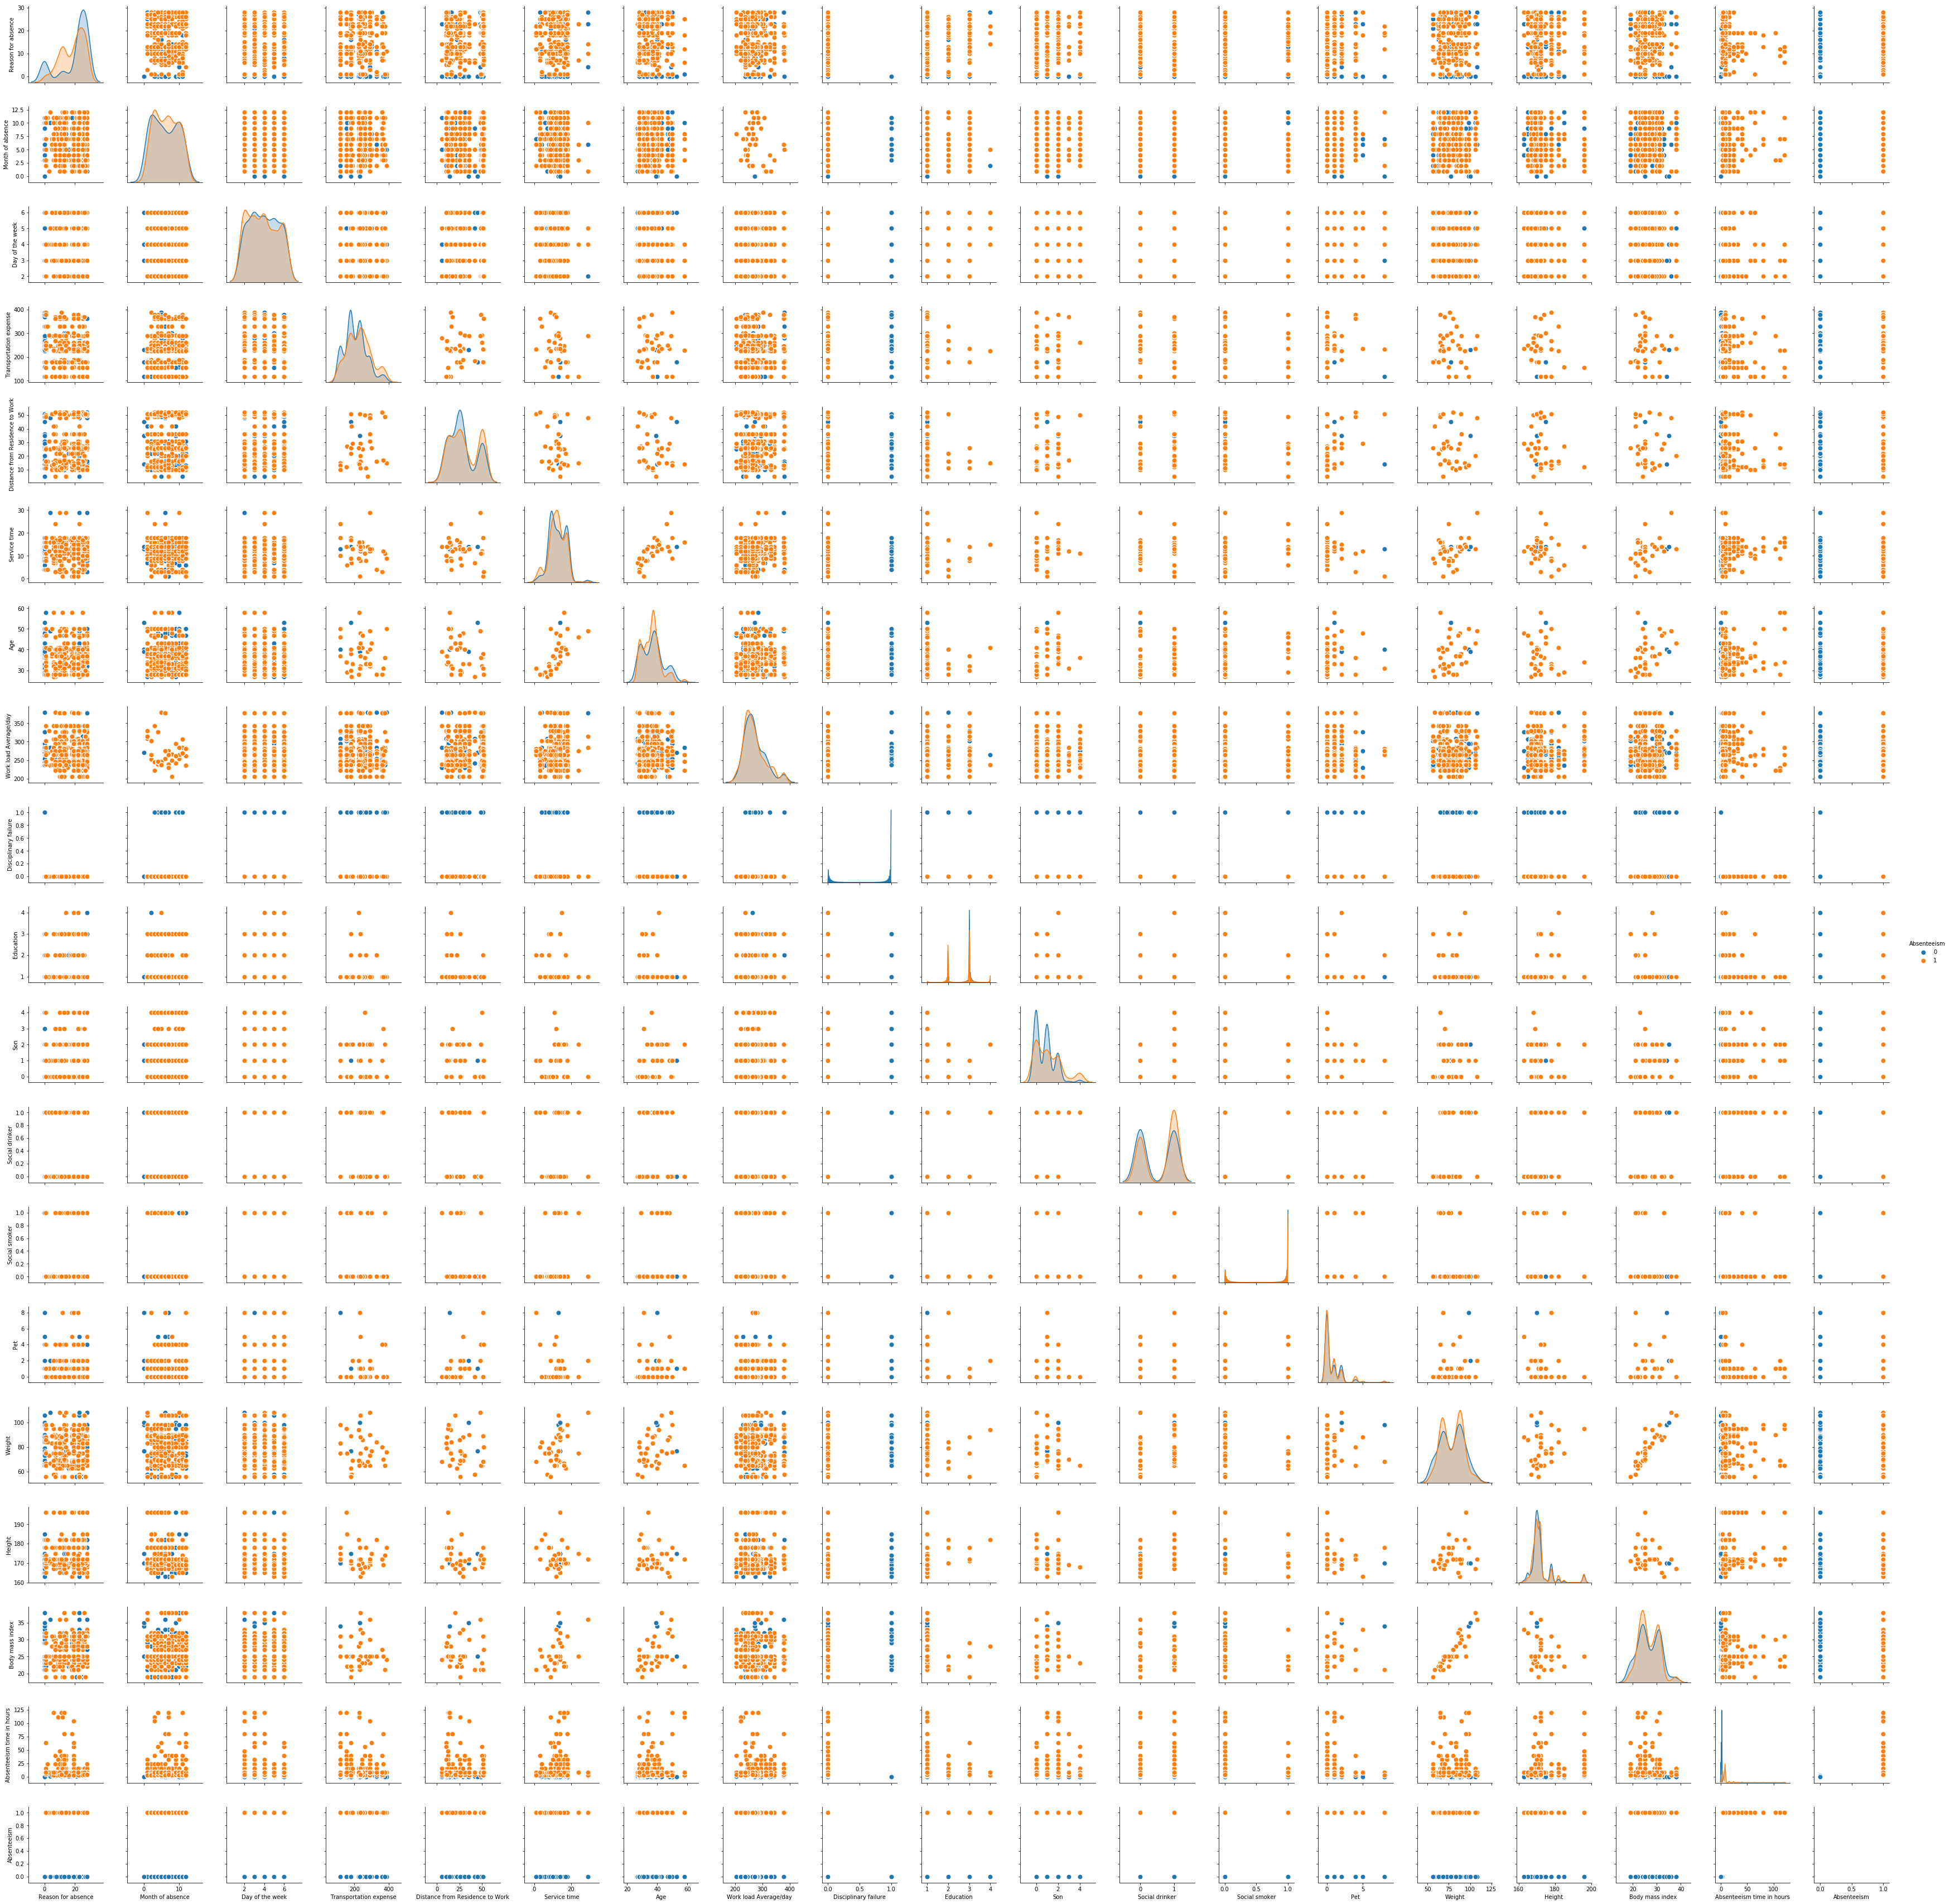

In [38]:
sns.pairplot(df_para_grafico, kind="scatter", hue="Absenteeism", plot_kws=dict(s=80, edgecolor="white", linewidth=1.0))
plt.show()

# Criando um dataset "tratado":
Vou copiar o dataset original em uma nova variável (df_target_novo) e tirar o atributo ID.

In [8]:
df_target_novo = df.drop(["Absenteeism time in hours", "ID"], axis=1).copy()

Vou testar alguns modelos separadamente e na seguinte ordem:

1. Árvore de decisão
2. Random forest
3. Logistic regression
4. Naive Bayes
5. SVM e Kernel SVM

# 1. Árvore de decisão
Comecei por esse pois é o modelo mais robusto a um dataprep mal feito.

In [74]:
x = df_target_novo.iloc[:, 0:-1]
y = df_target_novo.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [78]:
from sklearn.tree import DecisionTreeClassifier, export

classificador = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=(len(x.columns)**0.5)*2)
classificador.fit(x_train, y_train)

y_pred = classificador.predict(x_test)

Métrica 1 (Acurácia): 0.783784.

Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        54
           1       0.87      0.78      0.82        94

   micro avg       0.78      0.78      0.78       148
   macro avg       0.77      0.79      0.77       148
weighted avg       0.80      0.78      0.79       148


Normalized confusion matrix
[[0.7962963  0.2037037 ]
 [0.22340426 0.77659574]]


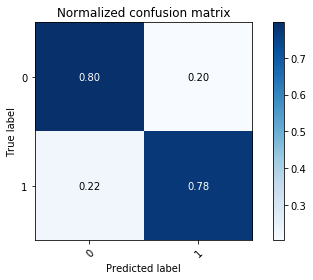

In [79]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

In [80]:
feature_importance = pd.DataFrame(data=(classificador.feature_importances_).reshape(1,19), columns=x_train.columns)

feature_importance.T

,0
Reason for absence,0.523116
Month of absence,0.000000
Day of the week,0.028887
Seasons,0.000000
Transportation expense,0.067423
Distance from Residence to Work,0.023222
Service time,0.000000
Age,0.032522
Work load Average/day,0.090244
Hit target,0.057047


# 2. Random forest
Outro modelo robusto a um dataprep mal feito.

In [83]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0, max_depth=(len(x.columns)**0.5)*2)
classificador.fit(x_train, y_train)

y_pred = classificador.predict(x_test)

Métrica 1 (Acurácia): 0.777027.

Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       0.74      0.59      0.66        54
           1       0.79      0.88      0.83        94

   micro avg       0.78      0.78      0.78       148
   macro avg       0.77      0.74      0.75       148
weighted avg       0.77      0.78      0.77       148


Normalized confusion matrix
[[0.59259259 0.40740741]
 [0.11702128 0.88297872]]


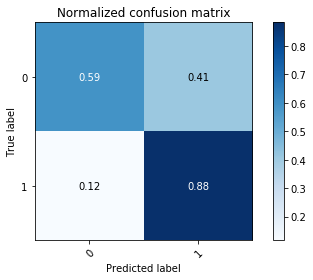

In [84]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

# 3. Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression

classificador = LogisticRegression(solver="lbfgs", max_iter=500)
classificador.fit(x_train, y_train)

y_pred = classificador.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



Métrica 1 (Acurácia): 0.77027.

Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       0.72      0.61      0.66        54
           1       0.79      0.86      0.83        94

   micro avg       0.77      0.77      0.77       148
   macro avg       0.76      0.74      0.74       148
weighted avg       0.77      0.77      0.77       148


Normalized confusion matrix
[[0.61111111 0.38888889]
 [0.13829787 0.86170213]]


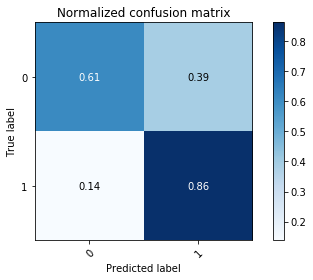

In [17]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

# 4. Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

classificador = GaussianNB()
classificador.fit(x_train, y_train)

y_pred = classificador.predict(x_test)

Métrica 1 (Acurácia): 0.702703.

Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       1.00      0.19      0.31        54
           1       0.68      1.00      0.81        94

   micro avg       0.70      0.70      0.70       148
   macro avg       0.84      0.59      0.56       148
weighted avg       0.80      0.70      0.63       148


Normalized confusion matrix
[[0.18518519 0.81481481]
 [0.         1.        ]]


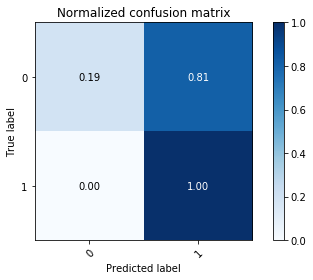

In [19]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

# 5. SVM

In [20]:
from sklearn.svm import SVC

classificador = SVC(kernel='linear', random_state=0)
classificador.fit(x_train, y_train)

y_pred = classificador.predict(x_test)

Métrica 1 (Acurácia): 0.77027.

Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       0.71      0.63      0.67        54
           1       0.80      0.85      0.82        94

   micro avg       0.77      0.77      0.77       148
   macro avg       0.75      0.74      0.75       148
weighted avg       0.77      0.77      0.77       148


Normalized confusion matrix
[[0.62962963 0.37037037]
 [0.14893617 0.85106383]]


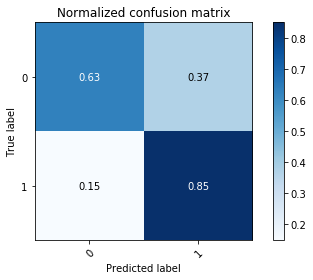

In [21]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);

# 6. Kernel SVM

In [26]:
from sklearn.svm import SVC

classificador = SVC(kernel='rbf', random_state=0, gamma="auto")
classificador.fit(x_train, y_train)

y_pred = classificador.predict(x_test)

Métrica 1 (Acurácia): 0.709459.

Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       0.70      0.35      0.47        54
           1       0.71      0.91      0.80        94

   micro avg       0.71      0.71      0.71       148
   macro avg       0.71      0.63      0.63       148
weighted avg       0.71      0.71      0.68       148


Normalized confusion matrix
[[0.35185185 0.64814815]
 [0.08510638 0.91489362]]


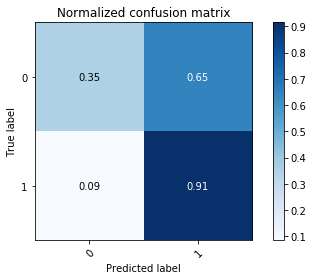

In [27]:
print("Métrica 1 (Acurácia): {:.6}.\n".format(accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}\n".format(classification_report(y_test, y_pred)))

plot_confusion_matrix_2(y_test, y_pred, normalize=True);